In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('E:/bbc txt classification/bbc/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

E:/bbc txt classification/bbc/README.TXT
E:/bbc txt classification/bbc/business\001.txt
E:/bbc txt classification/bbc/business\002.txt
E:/bbc txt classification/bbc/business\003.txt
E:/bbc txt classification/bbc/business\004.txt
E:/bbc txt classification/bbc/business\005.txt
E:/bbc txt classification/bbc/business\006.txt
E:/bbc txt classification/bbc/business\007.txt
E:/bbc txt classification/bbc/business\008.txt
E:/bbc txt classification/bbc/business\009.txt
E:/bbc txt classification/bbc/business\010.txt
E:/bbc txt classification/bbc/business\011.txt
E:/bbc txt classification/bbc/business\012.txt
E:/bbc txt classification/bbc/business\013.txt
E:/bbc txt classification/bbc/business\014.txt
E:/bbc txt classification/bbc/business\015.txt
E:/bbc txt classification/bbc/business\016.txt
E:/bbc txt classification/bbc/business\017.txt
E:/bbc txt classification/bbc/business\018.txt
E:/bbc txt classification/bbc/business\019.txt
E:/bbc txt classification/bbc/business\020.txt
E:/bbc txt classifi

In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from matplotlib import pyplot as plt
import seaborn as sns
#import eli5
from IPython.display import Image

In [5]:
dirname.split('/')[2]

'bbc'

In [7]:
# Step 1 - Get the file details
directory = []
file = []
title = []
text = []
label = []
datapath = 'E:/bbc txt classification/bbc/' 
for dirname, _ , filenames in os.walk(datapath):
    #print('Directory: ', dirname)
    #print('Subdir: ', dirname.split('/')[-1])
    # remove the Readme.txt file
    # will not find file in the second iteration so we skip the error
    try:
        filenames.remove('README.TXT')
    except:
        pass
    for filename in filenames:
        directory.append(dirname)
        file.append(filename)
        label.append(dirname.split('/')[-1])
        #print(filename)
        fullpathfile = os.path.join(dirname,filename)
        with open(fullpathfile, 'r', encoding="utf8", errors='ignore') as infile:
            intext = ''
            firstline = True
            for line in infile:
                if firstline:
                    title.append(line.replace('\n',''))
                    firstline = False
                else:
                    intext = intext + ' ' + line.replace('\n','')
            text.append(intext)

In [8]:
fulldf = pd.DataFrame(list(zip(directory, file, title, text, label)), 
               columns =['directory', 'file', 'title', 'text', 'label'])

df = fulldf.filter(['title','text','label'], axis=1)

print("FullDf : ", fulldf.shape)
print("DF : ", df.shape)

FullDf :  (2225, 5)
DF :  (2225, 3)


In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)
print("Train DF: ",train.shape)
print("Test DF: ",test.shape)

Train DF:  (1780, 3)
Test DF:  (445, 3)


In [10]:
df.head()

,title,text,label
0,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarn...,business
1,Dollar gains on Greenspan speech,The dollar has hit its highest level against...,business
2,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yu...,business
3,High fuel prices hit BA's profits,British Airways has blamed high fuel prices ...,business
4,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dom...,business


In [11]:
df.tail()

,title,text,label
2220,BT program to beat dialler scams,BT is introducing two initiatives to help be...,tech
2221,Spam e-mails tempt net shoppers,Computer users across the world continue to ...,tech
2222,Be careful how you code,A new European directive could put software ...,tech
2223,US cyber security chief resigns,The man making sure US computer networks are...,tech
2224,Losing yourself in online gaming,Online role playing games are time-consuming...,tech


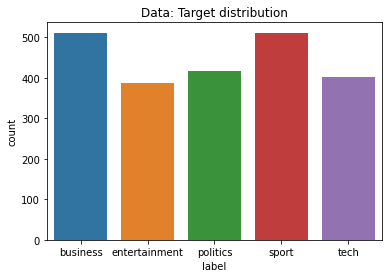

In [12]:
sns.countplot(df['label']);
plt.title('Data: Target distribution');

In [13]:
text_transformer = TfidfVectorizer(stop_words='english', 
                                   ngram_range=(1, 2), lowercase=True, max_features=95)

In [14]:
X_train_text = text_transformer.fit_transform(train['text'])
X_test_text = text_transformer.transform(test['text'])

In [15]:
X_train = X_train_text
X_test = X_test_text
print("X Train DF: ",X_train.shape)
print("X Test DF: ", X_test.shape)

X Train DF:  (1780, 95)
X Test DF:  (445, 95)


In [16]:
X_train

<1780x95 sparse matrix of type '<class 'numpy.float64'>'
	with 30374 stored elements in Compressed Sparse Row format>

In [17]:
X_test

<445x95 sparse matrix of type '<class 'numpy.float64'>'
	with 7518 stored elements in Compressed Sparse Row format>

In [18]:
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial',
                           random_state=17, n_jobs=4)

In [19]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [20]:
%%time
cv_results = cross_val_score(logit, X_train, train['label'], cv=skf, scoring='f1_macro')

Wall time: 4.71 s


In [21]:
cv_results

array([0.86177048, 0.87388424, 0.87448097, 0.8596158 , 0.86858865])

In [22]:
logit=logit.fit(X_train, train['label'])

In [23]:
logit

LogisticRegression(C=50.0, multi_class='multinomial', n_jobs=4, random_state=17)

In [24]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('E:/bbc txt classification/bbc_test/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

E:/bbc txt classification/bbc_test/000.txt
E:/bbc txt classification/bbc_test/001.txt
E:/bbc txt classification/bbc_test/002.txt
E:/bbc txt classification/bbc_test/003.txt
E:/bbc txt classification/bbc_test/004.txt
E:/bbc txt classification/bbc_test/005.txt


In [25]:
filenames

['000.txt', '001.txt', '002.txt', '003.txt', '004.txt', '005.txt']

In [26]:
# Step 1 - Get the file details
directory = []
file = []
title = []
text = []
label = []
datapath = 'E:/bbc txt classification/bbc_test/' 
for dirname, _ , filenames in os.walk(datapath):
    #print('Directory: ', dirname)
    #print('Subdir: ', dirname.split('/')[-1])
    # remove the Readme.txt file
    # will not find file in the second iteration so we skip the error
    try:
        filenames.remove('README.TXT')
    except:
        pass
    for filename in filenames:
        directory.append(dirname)
        file.append(filename)
        label.append(dirname.split('/')[-1])
        #print(filename)
        fullpathfile = os.path.join(dirname,filename)
        with open(fullpathfile, 'r', encoding="utf8", errors='ignore') as infile:
            intext = ''
            firstline = True
            for line in infile:
                if firstline:
                    title.append(line.replace('\n',''))
                    firstline = False
                else:
                    intext = intext + ' ' + line.replace('\n','')
            text.append(intext)

In [27]:
fulldf_test = pd.DataFrame(list(zip(directory, file, title, text, label)), 
               columns =['directory', 'file', 'title', 'text','label'])

test = fulldf_test.filter(['title','text'], axis=1)

#print(fulldf_test.shape)
#print(test.shape)

In [28]:
test.head()

,title,text
0,Increased opening for data scientists,To predict the share market price data scien...
1,Tv shows,Tv channels increased their shows to enterta...
2,Christmas eve,Many malls are decorated by christmas tree a...
3,Election commission,The government announces subsidiary on elect...
4,India won,One day cricket match held at xxx.


In [29]:
test_text_transformer = TfidfVectorizer(stop_words='english', 
                                   ngram_range=(1, 2), lowercase=True, max_features=95)

In [30]:
test_x = test_text_transformer.fit_transform(test['text'])

In [31]:
test_x

<6x95 sparse matrix of type '<class 'numpy.float64'>'
	with 95 stored elements in Compressed Sparse Row format>

In [32]:
pred=logit.predict(test_x)

In [33]:
pred

array(['tech', 'business', 'sport', 'business', 'entertainment', 'tech'],
      dtype=object)

In [34]:
import pandas as pd
p=pd.DataFrame({'title':test['title'],'text':test['text'],'label':pred})

In [35]:
p

,title,text,label
0,Increased opening for data scientists,To predict the share market price data scien...,tech
1,Tv shows,Tv channels increased their shows to enterta...,business
2,Christmas eve,Many malls are decorated by christmas tree a...,sport
3,Election commission,The government announces subsidiary on elect...,business
4,India won,One day cricket match held at xxx.,entertainment
5,5g Mobile launches,To increase the speed of internet mobile com...,tech


In [36]:
tech=p[p['label']=='tech']
pol=p[p['label']=='politics']
sport=p[p['label']=='sport']
business=p[p['label']=='business']
ent=p[p['label']=='entertainment']

In [37]:
business.shape

(2, 3)

In [38]:
len(business)

2

In [39]:
p

,title,text,label
0,Increased opening for data scientists,To predict the share market price data scien...,tech
1,Tv shows,Tv channels increased their shows to enterta...,business
2,Christmas eve,Many malls are decorated by christmas tree a...,sport
3,Election commission,The government announces subsidiary on elect...,business
4,India won,One day cricket match held at xxx.,entertainment
5,5g Mobile launches,To increase the speed of internet mobile com...,tech


In [40]:
p['label'].unique()

array(['tech', 'business', 'sport', 'entertainment'], dtype=object)

In [41]:
p

,title,text,label
0,Increased opening for data scientists,To predict the share market price data scien...,tech
1,Tv shows,Tv channels increased their shows to enterta...,business
2,Christmas eve,Many malls are decorated by christmas tree a...,sport
3,Election commission,The government announces subsidiary on elect...,business
4,India won,One day cricket match held at xxx.,entertainment
5,5g Mobile launches,To increase the speed of internet mobile com...,tech


In [42]:
pred=['business','entertainment','politics','sports','tech','tech','sports','politics','entertainment','business']

In [43]:
pred

['business',
 'entertainment',
 'politics',
 'sports',
 'tech',
 'tech',
 'sports',
 'politics',
 'entertainment',
 'business']

In [44]:
t=p[p['label']=='tech']
pol=p[p['label']=='politics']
s=p[p['label']=='sports']
b=p[p['label']=='business']
e=p[p['label']=='entertainment']

In [45]:
t

,title,text,label
0,Increased opening for data scientists,To predict the share market price data scien...,tech
5,5g Mobile launches,To increase the speed of internet mobile com...,tech


In [46]:
for i in (t,pol,s,b,e):
    i=i.drop(['label'],axis=1,inplace=True)

In [47]:
p['text']

0      To predict the share market price data scien...
1      Tv channels increased their shows to enterta...
2      Many malls are decorated by christmas tree a...
3      The government announces subsidiary on elect...
4                   One day cricket match held at xxx.
5      To increase the speed of internet mobile com...
Name: text, dtype: object

In [48]:
len(b)

2

In [49]:
p

,title,text,label
0,Increased opening for data scientists,To predict the share market price data scien...,tech
1,Tv shows,Tv channels increased their shows to enterta...,business
2,Christmas eve,Many malls are decorated by christmas tree a...,sport
3,Election commission,The government announces subsidiary on elect...,business
4,India won,One day cricket match held at xxx.,entertainment
5,5g Mobile launches,To increase the speed of internet mobile com...,tech


In [50]:
p['text']

0      To predict the share market price data scien...
1      Tv channels increased their shows to enterta...
2      Many malls are decorated by christmas tree a...
3      The government announces subsidiary on elect...
4                   One day cricket match held at xxx.
5      To increase the speed of internet mobile com...
Name: text, dtype: object

In [51]:
labels=['b','s','t','pol','e']
lab=[b,s,t,pol,e]
for i,j in zip(labels,lab):
    rows= range(0,len(j))
    for k in rows:
        print(rows)
        print('E:\\bbc txt classification\\classified\\%s\\np%d.txt' %(i,k),'%s' %j.values[k])

range(0, 2)
E:\bbc txt classification\classified\b\np0.txt ['Tv shows' '  Tv channels increased their shows to entertain people']
range(0, 2)
E:\bbc txt classification\classified\b\np1.txt ['Election commission'
 '  The government announces subsidiary on electric bill due to election. Election commission announced that the election will be on next week.']
range(0, 2)
E:\bbc txt classification\classified\t\np0.txt ['Increased opening for data scientists'
 '  To predict the share market price data scientists needed.']
range(0, 2)
E:\bbc txt classification\classified\t\np1.txt ['5g Mobile launches'
 '  To increase the speed of internet mobile company planning to launch 5g network soon   ']
range(0, 1)
E:\bbc txt classification\classified\e\np0.txt ['India won' '  One day cricket match held at xxx.']


In [56]:
j

,title,text
4,India won,One day cricket match held at xxx.


In [63]:
import numpy as np
labels=['b','s','t','pol','e']
lab=[b,s,t,pol,e]
for i,j in zip(labels,lab):
    rows= range(0,len(j))
    for k in rows:
        np.savetxt(r'E:\bbc txt classification\classified\%s\np%d.txt' %(i,k),['%s'] %j.values[k],fmt='%s',encoding=None)